<h1 style="text-align: center;">Amazon Top 50 Bestselling Books 2009 - 2019</h1>


### Goal:

The aim of this analysis is to investigate the bestselling Amazon book data from 2009 to 2019 to identify trends and characteristics that define a bestselling book. This will involve:

1. **Trend Analysis**: Examine sales patterns over the decade, including shifts in popular genres and seasonal fluctuations.

2. **Key Characteristics**: Identify common attributes among bestselling books, such as genre, author reputation, and book format.

3. **Consumer Insights**: Understand factors influencing purchasing decisions, including marketing strategies and reader reviews.

4. **Visual Representation**: Create visualizations to effectively communicate the trends and insights gained from the data.

By achieving these objectives, we aim to provide valuable insights into what contributes to a book’s success in the market.

In [2]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
book_data = pd.read_csv('F:/portfolio projects/EDA_mini_project/Amazon top 50 selling books/bestsellers with categories.csv')

In [4]:
book_data.head(4)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction


In [5]:
book_data.shape

(550, 7)

In [6]:
book_data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [7]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
book_data.isna().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [9]:
book_data.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

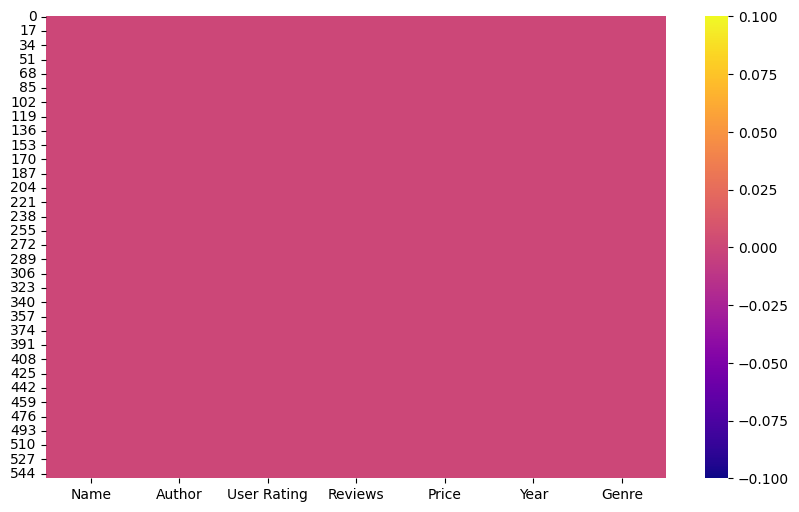

In [19]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.heatmap(book_data.isna(), cmap='plasma')  # We can change 'plasma' to any other colormap
plt.show()

In [20]:
book_data.median

<bound method NDFrame._add_numeric_operations.<locals>.median of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction 

### Outliers and Outlier Detection Techniques


Outliers are data points that significantly deviate from the overall pattern in a dataset, potentially skewing analysis and impacting model performance. Common techniques for detecting outliers include:


1. **Statistical Methods**: Using Z-scores or the Interquartile Range (IQR) to identify points that fall outside expected ranges.
2. **Visualization**: Box plots and scatter plots can visually highlight outliers.
3. **Machine Learning**: Algorithms like Isolation Forest and DBSCAN help identify outliers based on data density and separation.


Effective outlier detection ensures more accurate data analysis and insights.

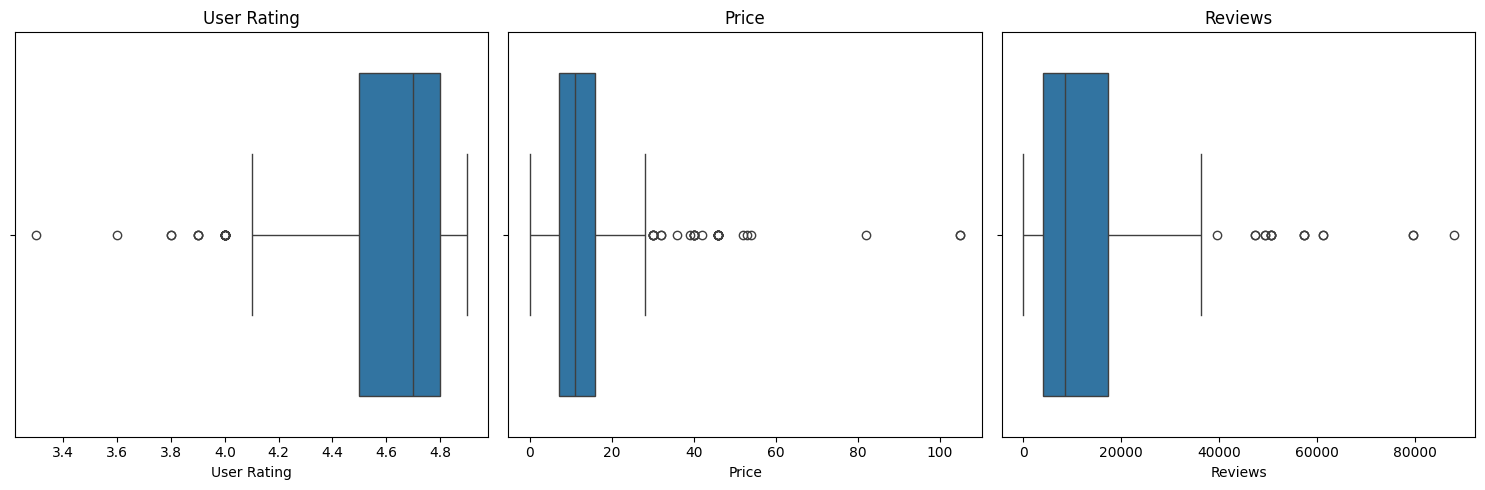

In [24]:
# Set up the figure
plt.figure(figsize=(15, 5))

# Box plot for User Rating
plt.subplot(1, 3, 1)
sns.boxplot(x=book_data['User Rating'])
plt.title('User Rating')

# Box plot for Price
plt.subplot(1, 3, 2)
sns.boxplot(x=book_data['Price'])
plt.title('Price')

# Box plot for Reviews
plt.subplot(1, 3, 3)
sns.boxplot(x=book_data['Reviews'])
plt.title('Reviews')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


These upper and Lower level outlier will be replaced by the 5th and 95th percentitle respectively 

#### numpy.clip() is used for handeling  outliers before creating the box plots, you can clip the values of "User Rating," "Price," and "Reviews" to a specified range.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7968\1951813783.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=book_data['Clipped User Rating'], palette='plasma', legend=False)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7968\1951813783.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=book_data['Clipped Price'], palette='plasma', legend=False)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7968\1951813783.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=book_data['Clipped Reviews'], palette='plasma', legend=False)


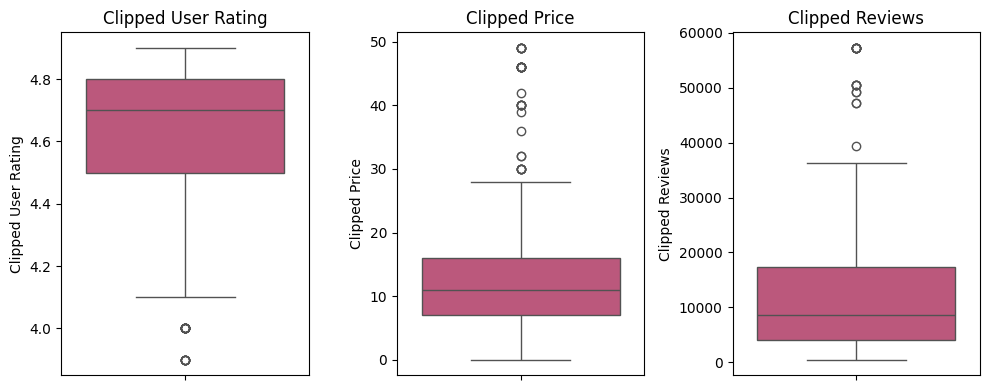

In [28]:
user_rating_range = (book_data['User Rating'].quantile(0.01), book_data['User Rating'].quantile(0.99))
price_range = (book_data['Price'].quantile(0.01), book_data['Price'].quantile(0.99))
reviews_range = (book_data['Reviews'].quantile(0.01), book_data['Reviews'].quantile(0.99))

# Clip values
book_data['Clipped User Rating'] = np.clip(book_data['User Rating'], *user_rating_range)
book_data['Clipped Price'] = np.clip(book_data['Price'], *price_range)
book_data['Clipped Reviews'] = np.clip(book_data['Reviews'], *reviews_range)

# Set up the figure with smaller size
plt.figure(figsize=(10, 4))

# Box plot for Clipped User Rating
plt.subplot(1, 3, 1)
sns.boxplot(y=book_data['Clipped User Rating'], palette='plasma', legend=False)
plt.title('Clipped User Rating')

# Box plot for Clipped Price
plt.subplot(1, 3, 2)
sns.boxplot(y=book_data['Clipped Price'], palette='plasma', legend=False)
plt.title('Clipped Price')

# Box plot for Clipped Reviews
plt.subplot(1, 3, 3)
sns.boxplot(y=book_data['Clipped Reviews'], palette='plasma', legend=False)
plt.title('Clipped Reviews')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Explore trends over year for each genre:

**Number of best-selling books in each genre each year**

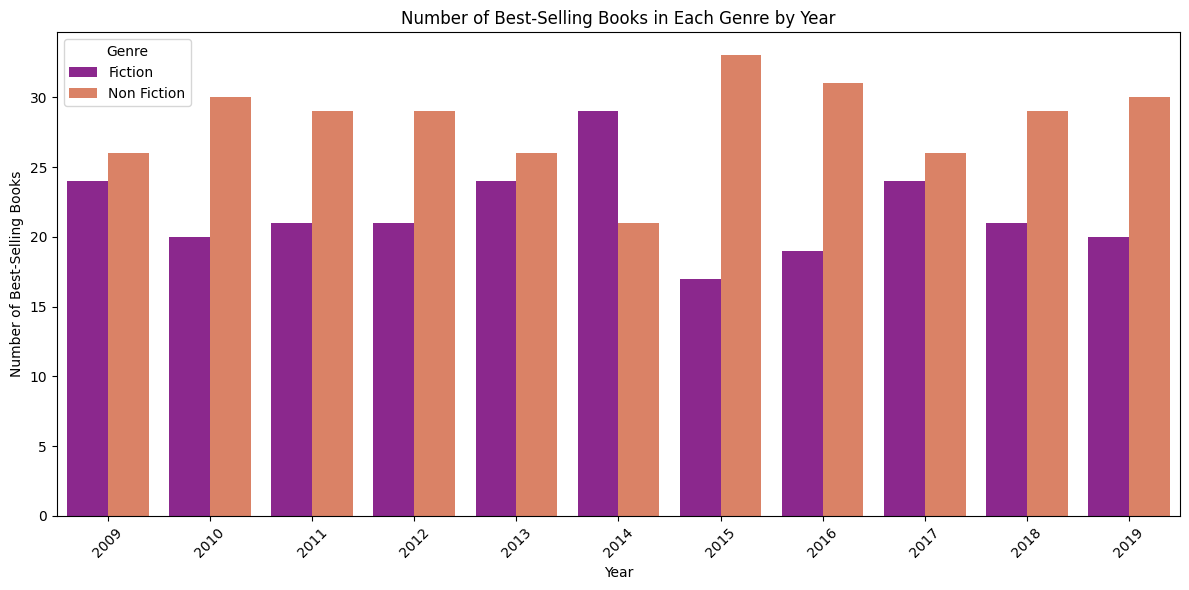

In [29]:
# Group by Year and Genre and count the number of best-selling books
genre_counts = book_data.groupby(['Year', 'Genre']).size().reset_index(name='Counts')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts, x='Year', y='Counts', hue='Genre', palette='plasma')

# Add titles and labels
plt.title('Number of Best-Selling Books in Each Genre by Year')
plt.xlabel('Year')
plt.ylabel('Number of Best-Selling Books')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


### Insights
**Number of Best-Selling Books by Genre by Year:**

The analysis of the number of best-selling books by genre over the years reveals significant trends in consumer preferences. Key insights include:

1. **Dominant Genres:** Certain genres consistently appear at the top of the bestseller lists, indicating their enduring appeal. This suggests that genres such as fiction or self-help have a stable market presence.

2. **Shifts in Preferences:** Fluctuations in the number of best-sellers across different genres over the years highlight changing consumer interests. Emerging genres may signal new opportunities for authors and publishers to explore fresh themes.

3.**Market Opportunities:** The identification of rising genres presents opportunities for authors to tap into these niches, potentially leading to future bestsellers.


**Top 10 Authors by Number of Best-Selling Books**

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7968\1722656028.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=author_counts.head(10), x='Number of Best-Selling Books', y='Author', palette='plasma')


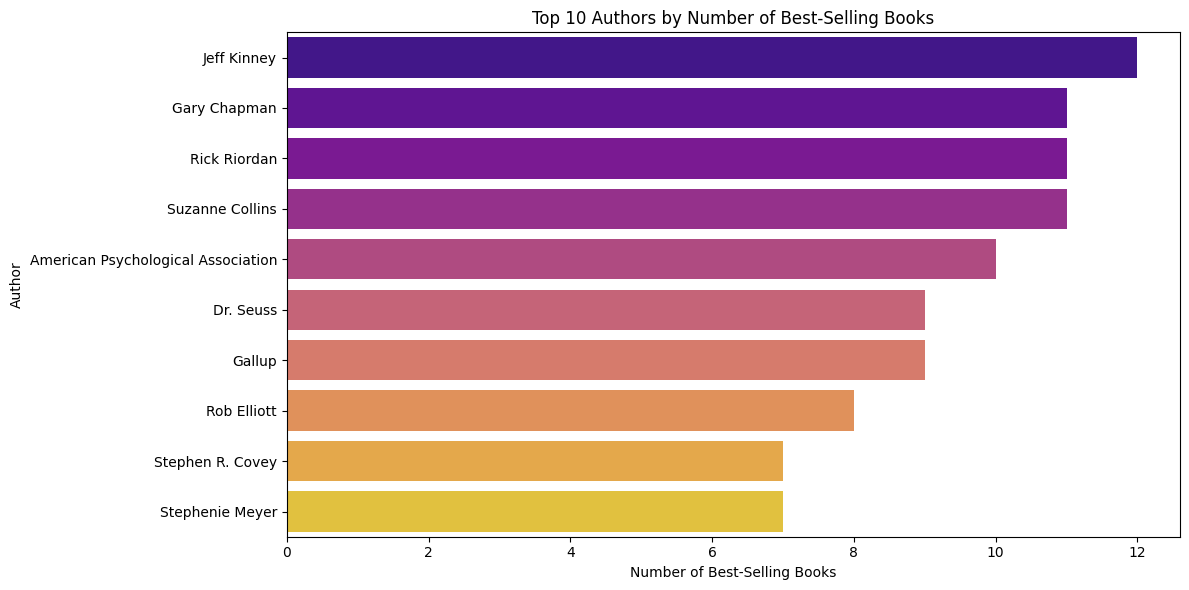

In [31]:
# Group by Author and count the number of best-selling books
author_counts = book_data['Author'].value_counts().reset_index()
author_counts.columns = ['Author', 'Number of Best-Selling Books']

# Create a bar plot for the top authors
plt.figure(figsize=(12, 6))
sns.barplot(data=author_counts.head(10), x='Number of Best-Selling Books', y='Author', palette='plasma')

# Add titles and labels
plt.title('Top 10 Authors by Number of Best-Selling Books')
plt.xlabel('Number of Best-Selling Books')
plt.ylabel('Author')
plt.tight_layout()
plt.show()


### Insights

**Top Authors by Number of Best-Selling Books:**

The examination of the number of best-selling books by author provides insights into the influence of established writers in the market. Key findings include:

1. **Author Reputation**: Authors with multiple bestsellers demonstrate significant brand loyalty among readers, highlighting the importance of an established reputation in driving sales.

2. **Diversity of Voices**: A varied list of authors suggests that readers are increasingly receptive to diverse perspectives, creating pathways for new authors to enter the market.

3. **Market Dynamics**: The dominance of a few authors in the bestseller rankings indicates potential market saturation in certain genres, underscoring the need for new entrants to differentiate themselves through unique storytelling and innovative marketing strategies.



### Results
The analysis reveals significant insights into consumer preferences, author influence, and market dynamics, providing valuable recommendations for authors, publishers, and marketers. Future research could expand upon these findings by incorporating larger datasets or additional variables.